# Climate dynamics
## Predicting the weather: timeseries approach
In this part of the climate dynamics tutorial, we will try to predict the temperature in Oxford on 19th November 2025. Here we will use daily timeseries data from a historical simulation of a climate model. 

Import all the requirements we need. We will be using `xarray` to open datasets again.

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import nc_time_axis
from IPython.display import display, Latex
from scipy.constants import convert_temperature

As we are using timeseries data, we will select daily time resolution. Since the task requires us to use CMIP6 data, we will use the historical experiment - this means it is the CMIP6 historical simulation, so it is may not be exactly in line with observations. 

In [3]:
data_path = "./data/"
filename = f"{data_path}t_CMIP6_historical_HadGEM3-GC31-LL_mon_195001-201412_UK.nc"

In [4]:
ds = xr.open_dataset(filename)
ds

<xarray.Dataset> Size: 22kB
Dimensions:          (bnds: 2, time: 780)
Coordinates:
    lat              float64 8B ...
    lon              float64 8B ...
  * time             (time) datetime64[ns] 6kB 1950-01-01 ... 2014-12-01
    member_id        <U29 116B ...
    gcm_institution  <U4 16B ...
    gcm_model        <U15 60B ...
    gcm_variant      <U8 32B ...
    height2m         float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    lat_bnds         (bnds) float64 16B ...
    lon_bnds         (bnds) float64 16B ...
    time_bnds        (time, bnds) datetime64[ns] 12kB ...
    t                (time) float32 3kB ...
    crs              int32 4B ...
Attributes: (12/28)
    Conventions:                CF-1.9 ACDD-1.3
    title:                      IPCC-WGI AR6 Interactive Atlas Dataset
    summary:                    IPCC-WGI AR6 Interactive Atlas dataset: Month...
    keywords:                   CMIP5, CMIP6, CORDEX, IPCC, Interactive Atlas
    institution:                Instituto de Fisica de Cantabria (IFCA, CSIC-...
    contact:                    ipcc-ddc@ifca.unican.es
    ...                         ...
    geospatial_lon_min:         -180.0
    geospatial_lon_max:         180.0
    geospatial_lon_resolution:  1.0
    geospatial_lon_units:       degrees_east
    date_created:               2022-10-26T00:00:00+00:00
    tracking_id:                4a14519f-05eb-4a2b-8e69-d5f1f8e500de

Select the variables and timeseries that is of interest for us. We want to get the air temperature variable `t`.

In [5]:
surface_temp = ds["t"] 
time = ds["time"] 
surface_temp

<xarray.DataArray 't' (time: 780)> Size: 3kB
[780 values with dtype=float32]
Coordinates:
    lat              float64 8B ...
    lon              float64 8B ...
  * time             (time) datetime64[ns] 6kB 1950-01-01 ... 2014-12-01
    member_id        <U29 116B ...
    gcm_institution  <U4 16B ...
    gcm_model        <U15 60B ...
    gcm_variant      <U8 32B ...
    height2m         float64 8B ...
Attributes:
    standard_name:  air_temperature
    units:          degC
    cell_methods:   time: mean within days time: mean over days area: mean
    long_name:      Monthly mean of daily mean temperature
    comment:        Monthly mean of daily mean near-surface (usually, 2 meter...
    grid_mapping:   crs

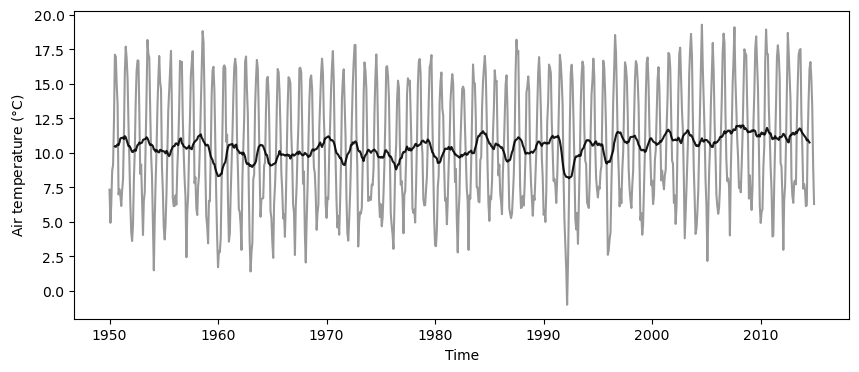

In [11]:
# Plot air temperature with time
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
plt.plot(time, surface_temp, 
         color="gray", alpha=0.8)
plt.ylabel("Air temperature ($\degree$C)")
plt.xlabel("Time")

# Add rolling averages to this plot
# Annual rolling averages
rolling_surface_temp_12 = surface_temp.rolling(time=12, center=True).mean()
plt.plot(rolling_surface_temp_12.time, rolling_surface_temp_12, 
         color="black", alpha=0.9)


## Climatology
In general, the "climatology" prediction is defined based on the temperature for a given location on a given date from the entire history. We generally assume we need at least 30 years of data. 


In [13]:
month = "11"

In [19]:
# Climatology estimated from full dataset.
surface_temp_Oxford_climatology = surface_temp.sel(time=slice(
    f"1950-{month}-01", 
    f"2014-{month}-30", 
    12))
surface_temp_Oxford_climatology_mean = surface_temp_Oxford_climatology.mean()
surface_temp_Oxford_climatology_std = surface_temp_Oxford_climatology.std()

Latex(f"Predicted temperature on 19th November 2025 is \
{surface_temp_Oxford_climatology_mean:.4f} $\pm$ {surface_temp_Oxford_climatology_std:.4f} deg C")

<IPython.core.display.Latex object>

In [22]:
surface_temp_Oxford_climatology

<xarray.DataArray 't' (time: 65)> Size: 260B
array([ 6.976562,  9.493164,  8.458984,  9.879883,  9.03418 ,  6.755859,
       10.041992,  7.791992,  8.72168 ,  6.932617, 11.3125  ,  8.797852,
        7.378906,  8.638672,  5.772461,  8.569336,  9.493164,  7.75    ,
        8.945312, 10.581055,  9.46875 ,  6.758789,  8.887695,  6.508789,
        6.662109,  9.910156,  7.689453, 10.047852,  9.964844,  8.894531,
        8.948242,  7.875   ,  9.711914,  7.506836,  9.009766,  8.362305,
        6.014648,  7.62207 ,  7.875   ,  9.644531, 10.147461,  8.250977,
        9.256836,  9.425781,  8.212891,  7.588867, 10.424805,  8.848633,
        9.264648,  9.80957 ,  8.      ,  9.429688, 11.59375 ,  8.916016,
       11.401367,  9.907227,  9.555664, 11.061523, 10.839844, 10.436523,
       11.235352,  9.255859,  8.198242, 10.397461,  9.017578], dtype=float32)
Coordinates:
    lat              float64 8B ...
    lon              float64 8B ...
  * time             (time) datetime64[ns] 520B 1950-11-01 ... 2014-11-01
    member_id        <U29 116B ...
    gcm_institution  <U4 16B ...
    gcm_model        <U15 60B ...
    gcm_variant      <U8 32B ...
    height2m         float64 8B ...
Attributes:
    standard_name:  air_temperature
    units:          degC
    cell_methods:   time: mean within days time: mean over days area: mean
    long_name:      Monthly mean of daily mean temperature
    comment:        Monthly mean of daily mean near-surface (usually, 2 meter...
    grid_mapping:   crs

How does predicted temperature change if we use a climatology estimate over last 30 years only?

In [20]:
# Last 30 years: 1984-2014
# Climatology estimated from full dataset.
surface_temp_Oxford_30yrclimatology = surface_temp.sel(time=slice(
    f"1984-{month}-01", 
    f"2014-{month}-30", 
    12))
surface_temp_Oxford_30yrclimatology_mean = surface_temp_Oxford_30yrclimatology.mean()
surface_temp_Oxford_30yrclimatology_std = surface_temp_Oxford_30yrclimatology.std()

Latex(f"Predicted temperature on 19th November 2025 is \
{surface_temp_Oxford_30yrclimatology_mean:.4f} $\pm$ {surface_temp_Oxford_30yrclimatology_std:.4f} K")

<IPython.core.display.Latex object>

Text(0.5, 0, 'Temperature (degree C)')

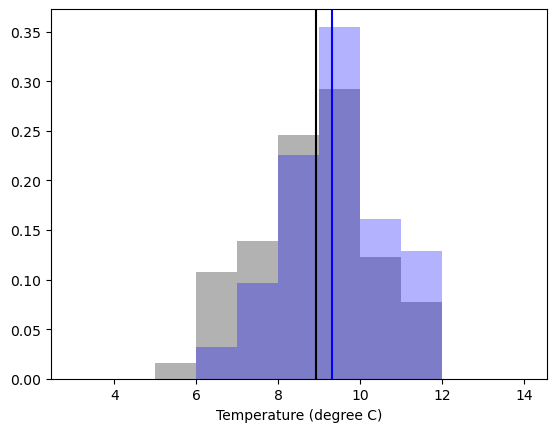

In [25]:
# Predict a distribution from current distribution of data
plt.hist(surface_temp_Oxford_climatology, bins = np.arange(3., 15., 1.), 
         color="black", alpha=0.3, density=True)
plt.axvline(surface_temp_Oxford_climatology_mean, color="black")
plt.hist(surface_temp_Oxford_30yrclimatology, bins = np.arange(3., 15., 1.), 
         color="blue", alpha=0.3, density=True)
plt.axvline(surface_temp_Oxford_30yrclimatology_mean, color="blue")
plt.xlabel("Temperature (degree C)")

## Advanced: consider changing climate.
The prediction we made is a very common approach called "climatology". Numerical weather prediction typically use the climatology as a baseline that we should be able to beat with more advanced techniques. We assumed a stationary climate, how would you account for changing climate? Here we will try to account for this with a linear regression. 

Text(0.5, 0, 'Year')

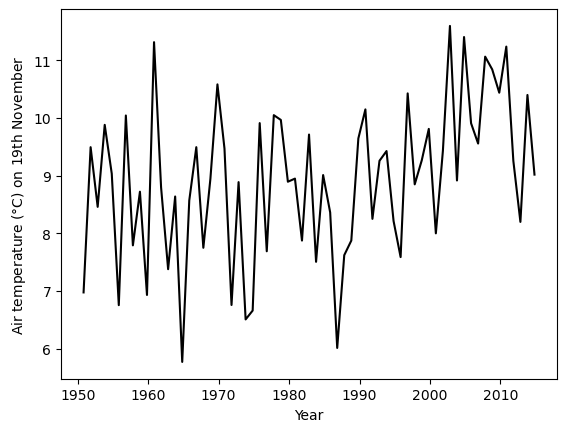

In [26]:
plt.plot(surface_temp_Oxford_climatology.time, surface_temp_Oxford_climatology, color="black")
plt.ylabel("Air temperature ($\degree$C) on 19th November")
plt.xlabel("Year")

Can we fit linear regression to this?

In [27]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
x = np.arange(1950, 2015).reshape(-1, 1)
y = surface_temp_Oxford_climatology.values.reshape(-1, 1)
reg.fit(x, y)

LinearRegression()

In [28]:
x_future = np.arange(2015, 2026).reshape(-1, 1)
predict_future = reg.predict(x_future)
predict_past = reg.predict(x)

Text(0.5, 0, 'Year')

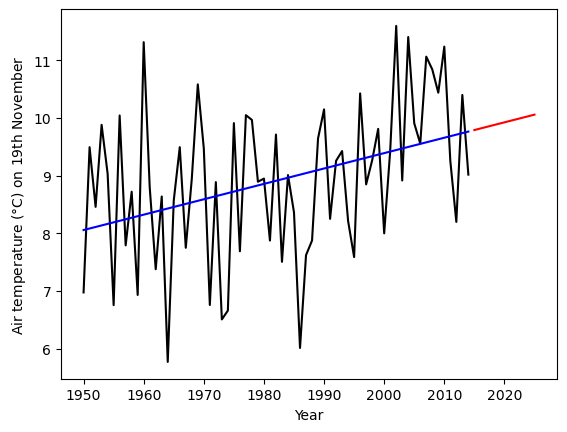

In [29]:
plt.plot(x, y, color="black")
plt.plot(x, predict_past, color="blue")
plt.plot(x_future, predict_future, color="red")
plt.ylabel("Air temperature ($\degree$C) on 19th November")
plt.xlabel("Year")

Can we add uncertainty estimates to this? For example, assuming the 1 standard deviation is constant with time:

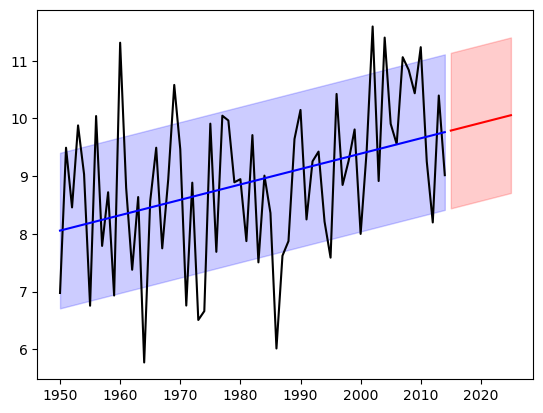

In [30]:
past_std = np.std(y)
plt.plot(x, y, color="black")
plt.plot(x, predict_past, color="blue")
plt.fill_between(x[:,0], 
                 predict_past[:,0] - past_std, 
                 predict_past[:,0] + past_std, 
                 color="blue",
                 alpha=0.2)

plt.plot(x_future, predict_future, color="red")
plt.fill_between(x_future[:,0], 
                 predict_future[:,0] - past_std, 
                 predict_future[:,0] + past_std, 
                 color="red",
                 alpha=0.2)


In [31]:
predict_2025 = reg.predict(np.array([2025]).reshape(-1, 1))[0, 0]
Latex(f"Predicted temperature on 19th November 2025 is {predict_2025:.4f} $\pm$ {past_std:.4f}")

<IPython.core.display.Latex object>

Think about ways to improve upon this using more data, more advanced methods, more models, etc.